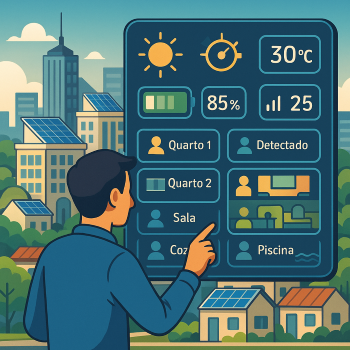

üéØ Objetivo do Projeto

Desenvolver uma solu√ß√£o baseada em ci√™ncia de dados e intelig√™ncia artificial para monitorar, prever e otimizar o consumo de energia el√©trica em uma resid√™ncia inteligente (Smart City Laguna). O projeto simula dados de sensores por c√¥modo e utiliza aprendizado de m√°quina para antecipar padr√µes de consumo e propor a√ß√µes de economia.

üîç Pergunta de Neg√≥cio

Como podemos monitorar e prever o consumo de energia de uma resid√™ncia inteligente com base em dados simulados de sensores por c√¥modo, a fim de propor a√ß√µes para redu√ß√£o e efici√™ncia energ√©tica?

üóÇÔ∏è Base de Dados

Utilizamos uma base de dados simulada contendo informa√ß√µes di√°rias de consumo total de energia (kWh), al√©m dos acionamentos de sensores em c√¥modos espec√≠ficos da casa (Quarto1, Quarto2, Sala, Cozinha, Piscina).

üî¨ O que foi testado

Foi testado um modelo de regress√£o linear para prever o consumo di√°rio de energia com base na quantidade de acionamentos nos c√¥modos. Tamb√©m exploramos visualiza√ß√µes para identificar os c√¥modos de maior impacto no consumo.

üßπ Pr√©-processamento de Dados

Os dados foram carregados, convertidos em formatos apropriados (por exemplo, data para datetime), e foram criadas vari√°veis auxiliares como 'dia ordinal'. Tamb√©m foi normalizado o consumo por acionamento.

üìä Interpreta√ß√£o dos Gr√°ficos

Os gr√°ficos demonstram a evolu√ß√£o temporal do consumo, a contribui√ß√£o relativa de cada c√¥modo, e previs√µes futuras com base nos acionamentos. Tamb√©m foi gerado um ranking de c√¥modos mais consumidores.



üìà Conclus√µes

O consumo est√° fortemente correlacionado com os acionamentos em sala e cozinha.
O modelo de regress√£o mostrou boa capacidade preditiva para consumo futuro.
C√¥modos como a piscina apresentam alto consumo mesmo com poucos acionamentos, indicando oportunidades de economia

An√°lise e Otimiza√ß√£o do Consumo de Energia Residencial por Ambiente



In [34]:
import locale
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#--------------------------------------------------
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [35]:
# Carregar o arquivo Excel com m√∫ltiplas abas
file_path = "/Users/fabicampanari/Desktop/Project Planet Smart City Laguna/2-CRISP-DM - Project Smart City Laguna/üáßüá∑ CRISP-DM_Projeto_Smart_City_Laguna/Consumo_de_Energia_Analise.xlsx"
xls = pd.ExcelFile(file_path)

# Listar os nomes das abas
sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [36]:
# Carregar os dados da aba "Sheet1"
df = xls.parse('Sheet1')

# Exibir as primeiras linhas para an√°lise inicial
df

Data  KW/H  Quarto1  Quarto2  Sala  Cozinha  Piscina
0    01/jan  1395       10        8    15       16        9
1    02/jan  1086        9        8    10        6       10
2    03/jan  1174       10       11     9       13        6
3    04/jan  1207        6        8    10        8       16
4    05/jan  1036       13        4    10        8        8
..      ...   ...      ...      ...   ...      ...      ...
206  26/jul  1355       12       12    12       10        6
207  27/jul  1533       14       12    16       13       10
208  28/jul   967        4        9     8        8        9
209  29/jul  1416       14       10    13        8       10
210  30/jul   789        8        4     6        3       13

[211 rows x 7 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     211 non-null    object
 1   KW/H     211 non-null    int64 
 2   Quarto1  211 non-null    int64 
 3   Quarto2  211 non-null    int64 
 4   Sala     211 non-null    int64 
 5   Cozinha  211 non-null    int64 
 6   Piscina  211 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.7+ KB


In [38]:
meses_pt = {
    'jan': '01',
    'fev': '02',
    'mar': '03',
    'abr': '04',
    'mai': '05',
    'jun': '06',
    'jul': '07',

}

# For√ßa o tipo string
df['Data'] = df['Data'].astype(str)

# Substitui os meses por n√∫meros
df['Data'] = df['Data'].str.lower().replace(meses_pt, regex=True)

# Adiciona o ano e converte para datetime
df['Data'] = pd.to_datetime(df['Data'] + '/2025', format='%d/%m/%Y')


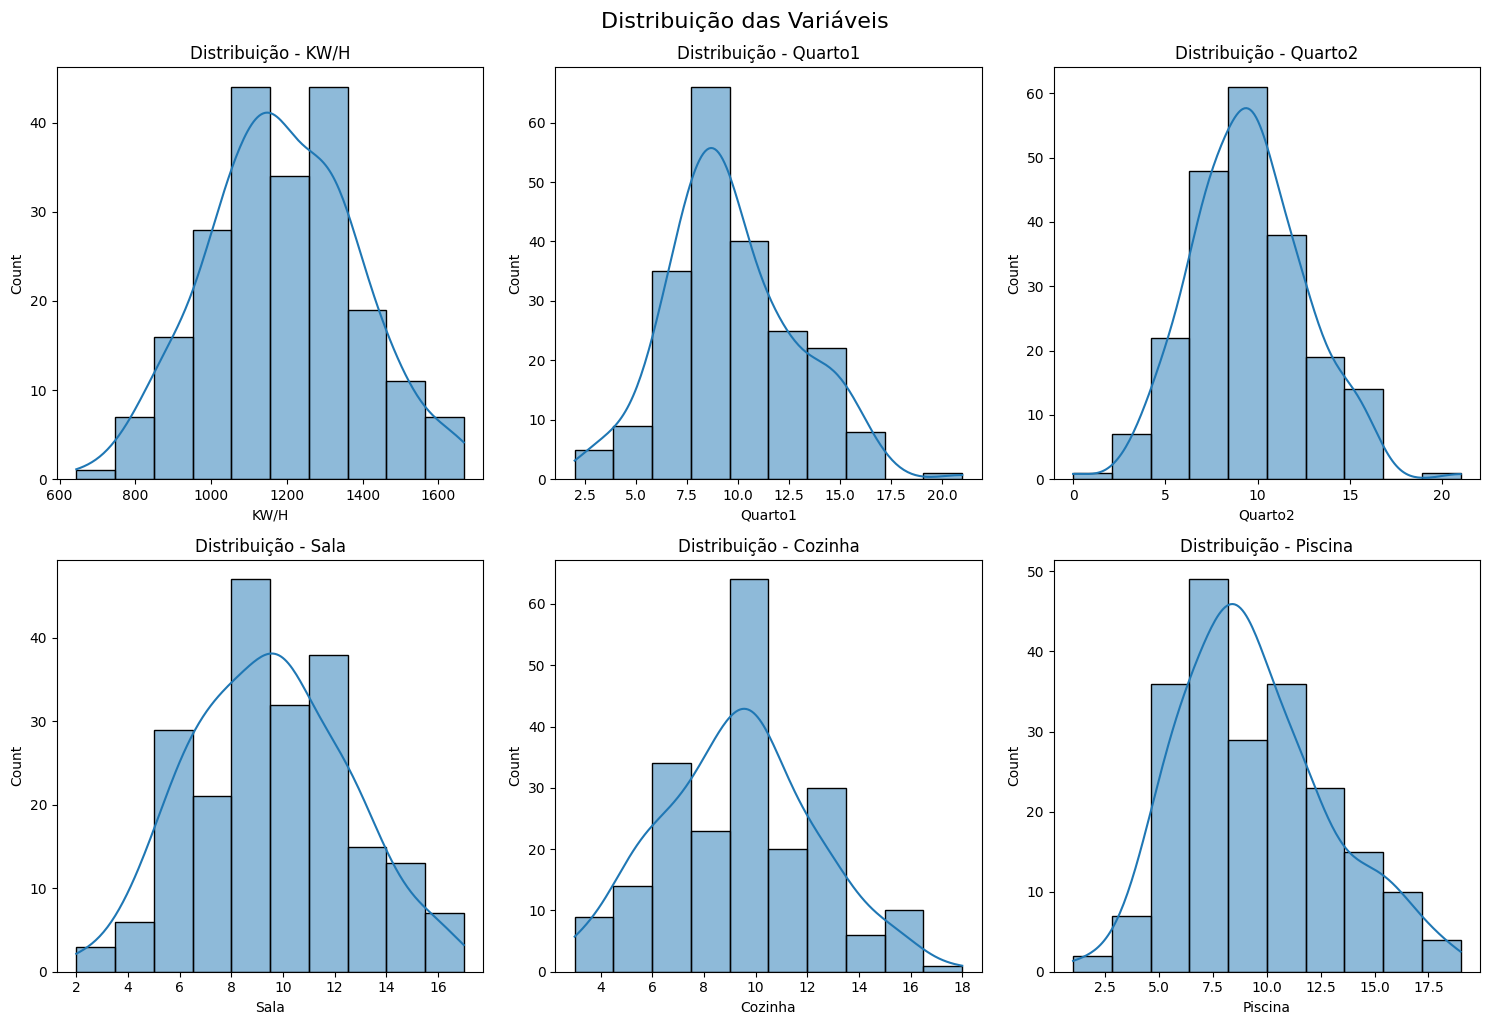

(                      Data         KW/H     Quarto1     Quarto2        Sala  \
 count                  211   211.000000  211.000000  211.000000  211.000000   
 mean   2025-04-16 00:00:00  1188.317536    9.687204    9.549763    9.445498   
 min    2025-01-01 00:00:00   644.000000    2.000000    0.000000    2.000000   
 25%    2025-02-22 12:00:00  1057.000000    8.000000    7.000000    7.000000   
 50%    2025-04-16 00:00:00  1176.000000    9.000000    9.000000    9.000000   
 75%    2025-06-07 12:00:00  1324.000000   12.000000   11.500000   12.000000   
 max    2025-07-30 00:00:00  1667.000000   21.000000   21.000000   17.000000   
 std                    NaN   197.439318    3.176817    3.073874    3.033247   
 
           Cozinha     Piscina  
 count  211.000000  211.000000  
 mean     9.322275    9.383886  
 min      3.000000    1.000000  
 25%      7.000000    7.000000  
 50%      9.000000    9.000000  
 75%     11.000000   11.000000  
 max     18.000000   19.000000  
 std      2.96

In [39]:
# Estat√≠sticas descritivas
summary = df.describe()

# Correla√ß√£o entre as vari√°veis
correlation = df.corr(numeric_only=True)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

cols = df.columns[1:7]  # pega s√≥ 6 colunas

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=10)
    axes[i].set_title(f'Distribui√ß√£o - {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()

plt.suptitle("Distribui√ß√£o das Vari√°veis", fontsize=16, y=1.02)
plt.show()

summary, correlation

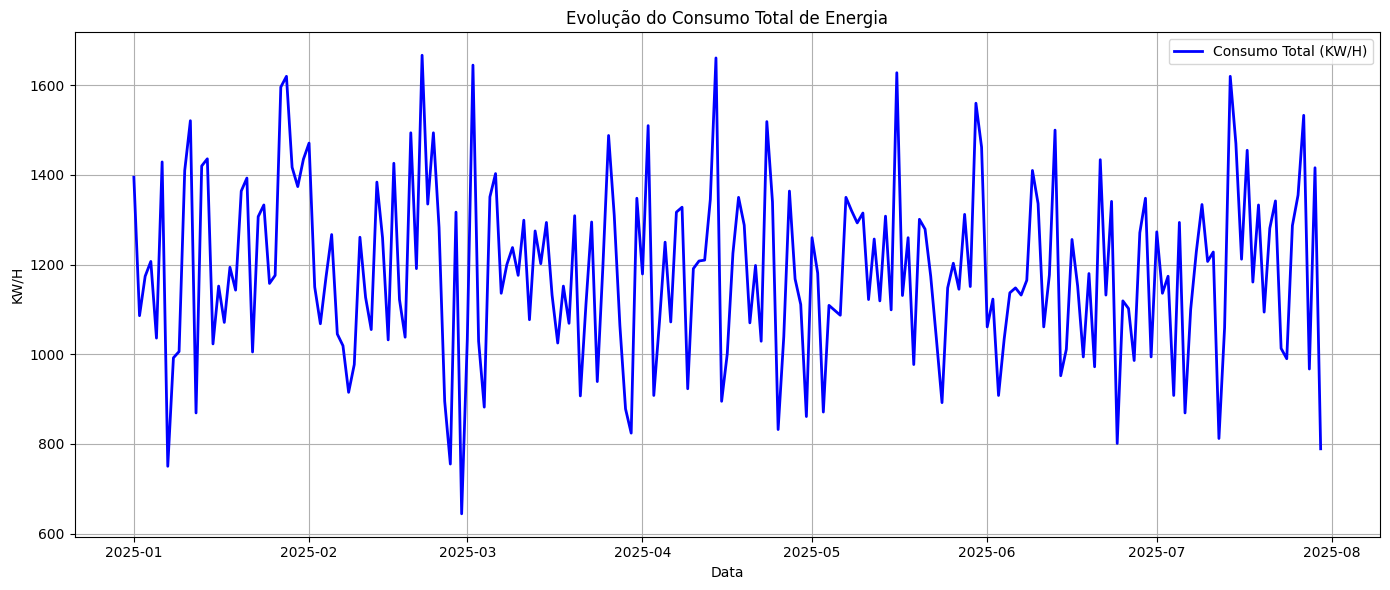

In [40]:
# Plotar consumo total ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['KW/H'], label='Consumo Total (KW/H)', color='blue', linewidth=2)
plt.title('Evolu√ß√£o do Consumo Total de Energia')
plt.xlabel('Data')
plt.ylabel('KW/H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

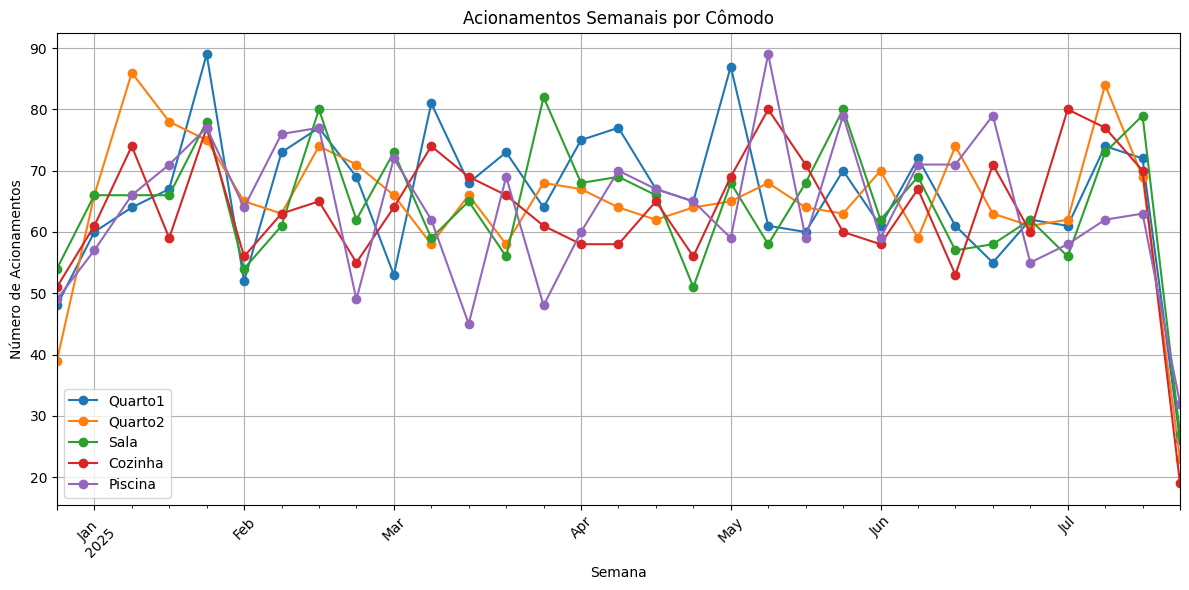

In [41]:
# Agrupa por semana (usando o in√≠cio da semana como refer√™ncia)
df['Semana'] = df['Data'].dt.to_period('W').apply(lambda r: r.start_time)
df_semana = df.groupby('Semana')[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']].sum()
df
# Plot
df_semana.plot(figsize=(12, 6), marker='o')
plt.title('Acionamentos Semanais por C√¥modo')
plt.ylabel('N√∫mero de Acionamentos')
plt.xlabel('Semana')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_60313/3101124598.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes.index, y=correlacoes.values, palette='Oranges_r')


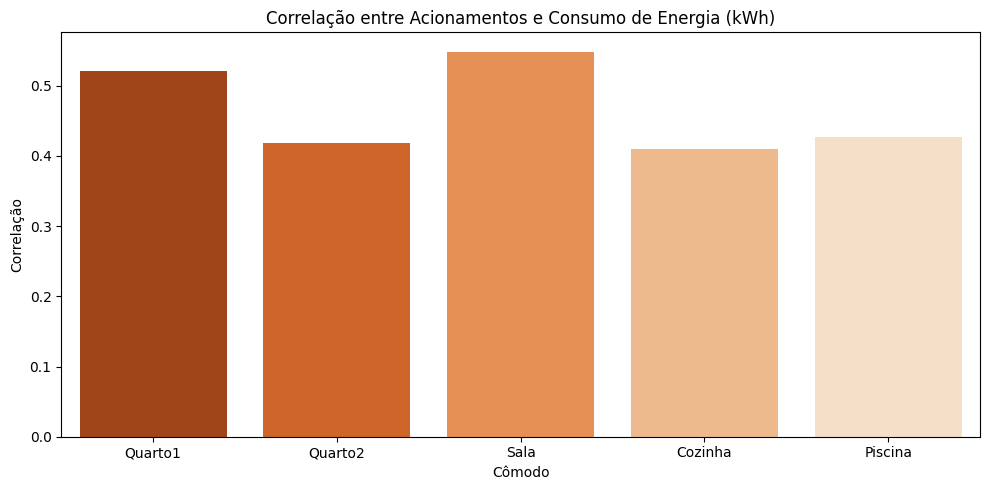

In [42]:
# Correla√ß√£o entre acionamentos e consumo
correlacoes = df[['KW/H', 'Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']].corr()['KW/H'][1:]

# Gr√°fico: Correla√ß√£o com consumo
plt.figure(figsize=(10, 5))
sns.barplot(x=correlacoes.index, y=correlacoes.values, palette='Oranges_r')
plt.title('Correla√ß√£o entre Acionamentos e Consumo de Energia (kWh)')
plt.ylabel('Correla√ß√£o')
plt.xlabel('C√¥modo')
plt.tight_layout()
plt.show()

Erro quadr√°tico m√©dio (MSE): 11528.06
Coeficiente de determina√ß√£o (R¬≤): 0.7


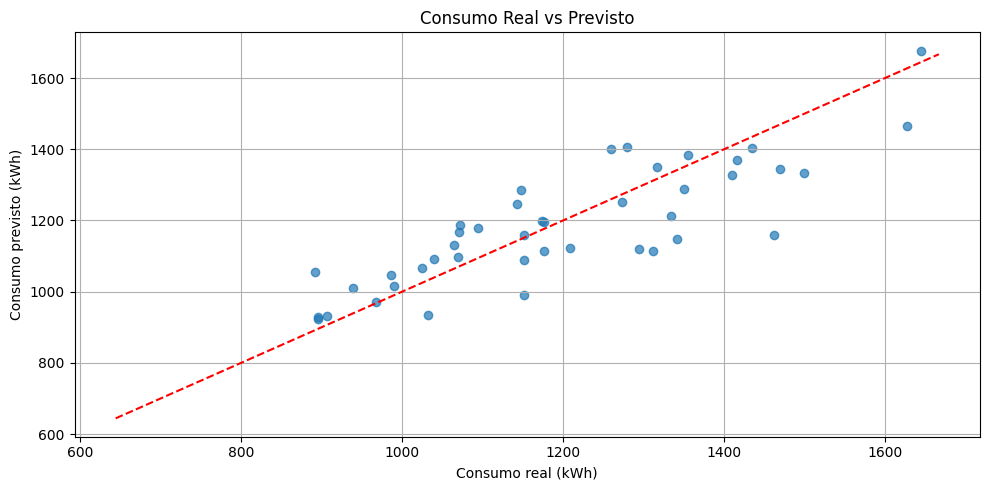


Contribui√ß√£o de cada c√¥modo na previs√£o (coeficientes):
Sala       28.214005
Quarto2    24.141777
Quarto1    23.279552
Cozinha    20.993133
dtype: float64


In [43]:
from sklearn.metrics import mean_squared_error

# 2. Selecionar vari√°veis
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha']]
y = df['KW/H']

# 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Treinar modelo de regress√£o linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 5. Fazer previs√µes
y_pred = modelo.predict(X_test)

# 6. Avaliar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadr√°tico m√©dio (MSE):", round(mse, 2))
print("Coeficiente de determina√ß√£o (R¬≤):", round(r2, 2))

# 7. Visualizar: consumo real vs previsto
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Consumo real (kWh)")
plt.ylabel("Consumo previsto (kWh)")
plt.title("Consumo Real vs Previsto")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Mostrar coeficientes de cada c√¥modo
coeficientes = pd.Series(modelo.coef_, index=X.columns)
print("\nContribui√ß√£o de cada c√¥modo na previs√£o (coeficientes):")
print(coeficientes.sort_values(ascending=False))

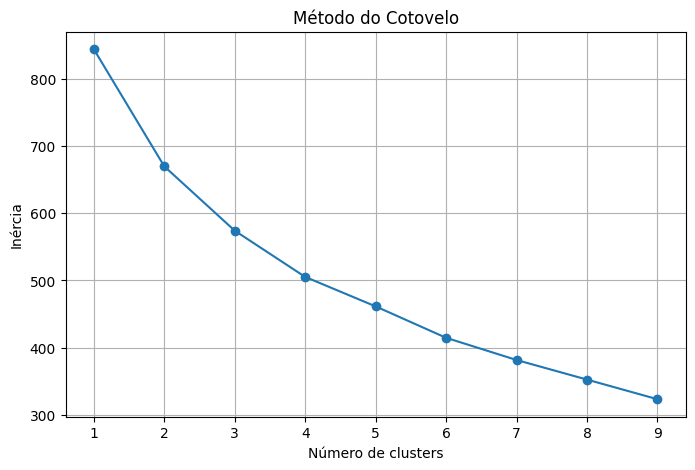

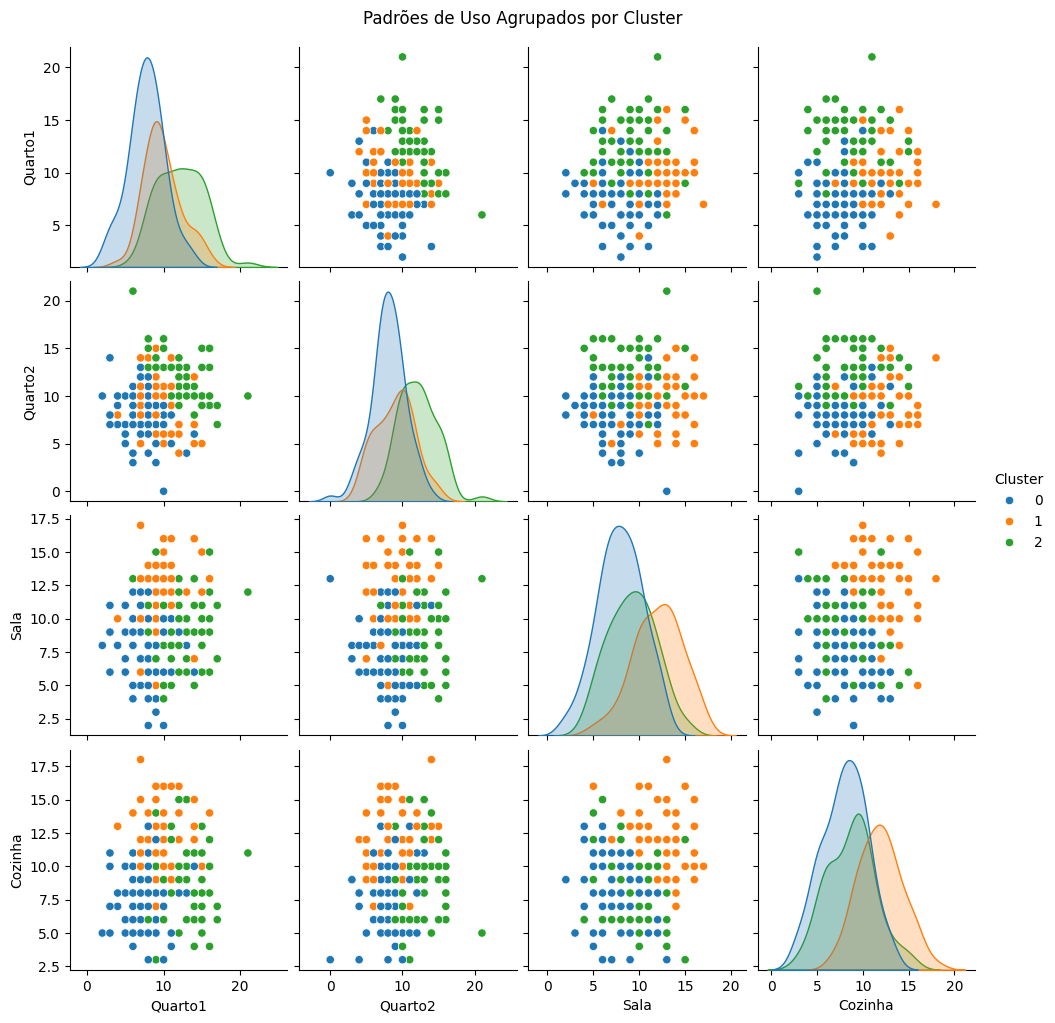

In [44]:
# --- Passo 1: Calcular total e percentual de acionamentos por dia
df['Total_acionamentos'] = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha']].sum(axis=1)
for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
    df[f'{comodo}_pct'] = df[comodo] / df['Total_acionamentos']


# Normaliza√ß√£o (muito importante para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# M√©todo do Cotovelo para achar o n√∫mero ideal de clusters
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('M√©todo do Cotovelo')
plt.xlabel('N√∫mero de clusters')
plt.ylabel('In√©rcia')
plt.grid(True)
plt.show()

# Pelo gr√°fico voc√™ escolhe o n√∫mero de clusters; aqui vamos usar 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualiza√ß√£o dos clusters (pareamento de vari√°veis)
sns.pairplot(df, hue='Cluster', vars=['Quarto1', 'Quarto2', 'Sala', 'Cozinha'], palette='tab10')
plt.suptitle("Padr√µes de Uso Agrupados por Cluster", y=1.02)
plt.show()


In [45]:
# Aplicar KMeans com o n√∫mero de clusters escolhido
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calcular perfil m√©dio por cluster (com acionamentos e percentuais)
col_pcts = [f'{c}_pct' for c in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha']]
perfil_clusters = df.groupby('Cluster')[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'KW/H'] + col_pcts].mean()

# Fun√ß√£o para nomear o perfil dos clusters considerando consumo e percentual de acionamentos
def nomear_cluster(row):
    media_kw = df['KW/H'].mean()

    if row['KW/H'] < media_kw * 0.75:
        consumo_total = 'üîµ Baixo Consumo'
    elif row['KW/H'] > media_kw * 1.25:
        consumo_total = 'üî¥ Alto Consumo'
    else:
        consumo_total = 'üü° Consumo Equilibrado'

    altos = []
    for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha']:
        media_pct = df[f'{comodo}_pct'].mean()
        if row[f'{comodo}_pct'] > media_pct * 1.2:  # 20% acima da m√©dia percentual
            altos.append(comodo)

    if consumo_total == 'üîµ Baixo Consumo':
        return consumo_total
    if consumo_total == 'üü° Consumo Equilibrado':
        if len(altos) == 0:
            return consumo_total
        else:
            return f"üü† Consumo Elevado em {', '.join(altos)}"
    if consumo_total == 'üî¥ Alto Consumo':
        if len(altos) == 0:
            return consumo_total
        else:
            return f"üî¥ Alto Consumo (Em {', '.join(altos)})"

perfil_clusters['Perfil'] = perfil_clusters.apply(nomear_cluster, axis=1)

# Fun√ß√£o para mapear perfil para chave do dicion√°rio de recomenda√ß√µes
def mapear_perfil_para_chave(perfil):
    if perfil == 'üîµ Baixo Consumo':
        return perfil
    if perfil == 'üü° Consumo Equilibrado':
        return perfil
    if perfil.startswith('üü† Consumo Elevado'):
        return 'üü† Consumo Elevado'
    if perfil.startswith('üî¥ Alto Consumo'):
        if 'Em' in perfil:
            idx = perfil.index('Em') + 3
            texto = perfil[idx:]
            principal = texto.split(',')[0].strip()
            if principal in ['Sala']:
                return 'üî¥ Alto Consumo (Sala/Cozinha)'
            elif principal == 'Cozinha':
                return 'üî¥ Alto Consumo (Cozinha)'
            else:
                return 'üî¥ Alto Consumo'
        else:
            return 'üî¥ Alto Consumo'
    return perfil

# Dicion√°rio com recomenda√ß√µes por perfil
recomendacoes = {
    'üîµ Baixo Consumo': [
        "‚úÖ Manter boas pr√°ticas j√° adotadas.",
        "üéÅ Oferecer recompensas ou descontos (gamifica√ß√£o).",
        "üîã Incentivar uso de energia solar / microgera√ß√£o."
    ],
    'üü° Consumo Equilibrado': [
        "üîå Automatizar desligamento de equipamentos em hor√°rios fixos.",
        "üïµÔ∏è Instalar sensores de presen√ßa em quartos e sala.",
        "üìä Enviar relat√≥rios semanais de uso comparativo."
    ],
    'üü† Consumo Elevado': [
        "üõèÔ∏è Automatizar luzes e eletr√¥nicos nos c√¥modos com consumo elevado.",
        "üïµÔ∏è Instalar sensores de presen√ßa espec√≠ficos para os c√¥modos.",
        "üìä Acompanhar o uso para identificar picos desnecess√°rios."
    ],
    'üî¥ Alto Consumo (Sala/Cozinha)': [
        "üíß Agendar funcionamento da bomba da Cozinha fora do pico.",
        "üí° Incentivar uso consciente da ilumina√ß√£o e eletr√¥nicos.",
        "üß† Sugerir automa√ß√£o e ades√£o √† tarifa branca."
    ],
    'üî¥ Alto Consumo (Cozinha)': [
        "üç≥ Verificar equipamentos de cozinha para consumo excessivo.",
        "‚è∞ Controlar hor√°rios de uso de forno e geladeira.",
        "üí° Incentivar uso eficiente da ilumina√ß√£o."
    ]
}

# Exibir perfis e recomenda√ß√µes
for cluster_id, row in perfil_clusters.iterrows():
    print(f"\n=== Cluster {cluster_id} - {row['Perfil']} ===")
    print("üìä Perfil m√©dio de consumo (acionamentos e kWh):")
    print(row[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'KW/H']])
    print("\nüìà Percentual m√©dio de acionamentos por c√¥modo (%):")
    print((row[col_pcts] * 100).round(2))
    print("\nüí° Recomenda√ß√µes:")
    chave = mapear_perfil_para_chave(row['Perfil'])
    if chave in recomendacoes:
        for rec in recomendacoes[chave]:
            print("-", rec)
    else:
        print("- Sem recomenda√ß√µes espec√≠ficas para este perfil.")




=== Cluster 0 - üü° Consumo Equilibrado ===
üìä Perfil m√©dio de consumo (acionamentos e kWh):
Quarto1       7.747126
Quarto2       8.034483
Sala          7.908046
Cozinha       8.011494
KW/H       1047.402299
Name: 0, dtype: object

üìà Percentual m√©dio de acionamentos por c√¥modo (%):
Quarto1_pct    24.481434
Quarto2_pct    25.376404
Sala_pct       24.970192
Cozinha_pct     25.17197
Name: 0, dtype: object

üí° Recomenda√ß√µes:
- üîå Automatizar desligamento de equipamentos em hor√°rios fixos.
- üïµÔ∏è Instalar sensores de presen√ßa em quartos e sala.
- üìä Enviar relat√≥rios semanais de uso comparativo.

=== Cluster 1 - üü° Consumo Equilibrado ===
üìä Perfil m√©dio de consumo (acionamentos e kWh):
Quarto1       9.830508
Quarto2       8.966102
Sala         11.983051
Cozinha      11.915254
KW/H       1290.898305
Name: 1, dtype: object

üìà Percentual m√©dio de acionamentos por c√¥modo (%):
Quarto1_pct    23.031643
Quarto2_pct     20.88838
Sala_pct       28.055102
Cozinha_pc

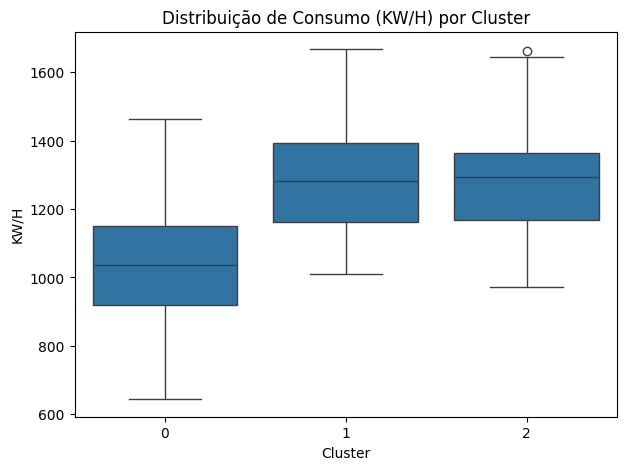

In [46]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Cluster', y='KW/H', data=df)
plt.title('Distribui√ß√£o de Consumo (KW/H) por Cluster')
plt.show()


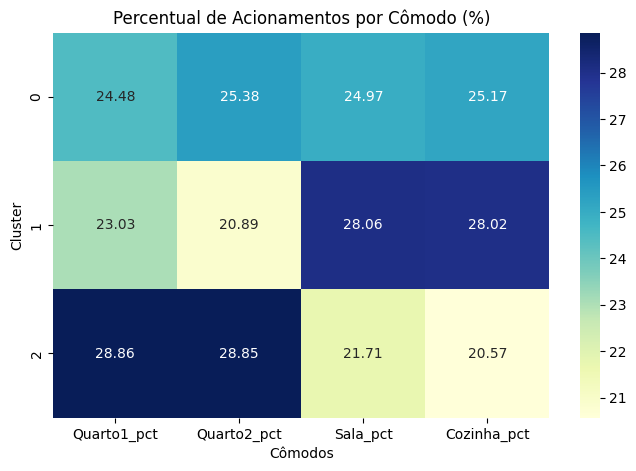

In [47]:
heatmap_data = perfil_clusters[col_pcts] * 100
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Percentual de Acionamentos por C√¥modo (%)')
plt.xlabel('C√¥modos')
plt.ylabel('Cluster')
plt.show()


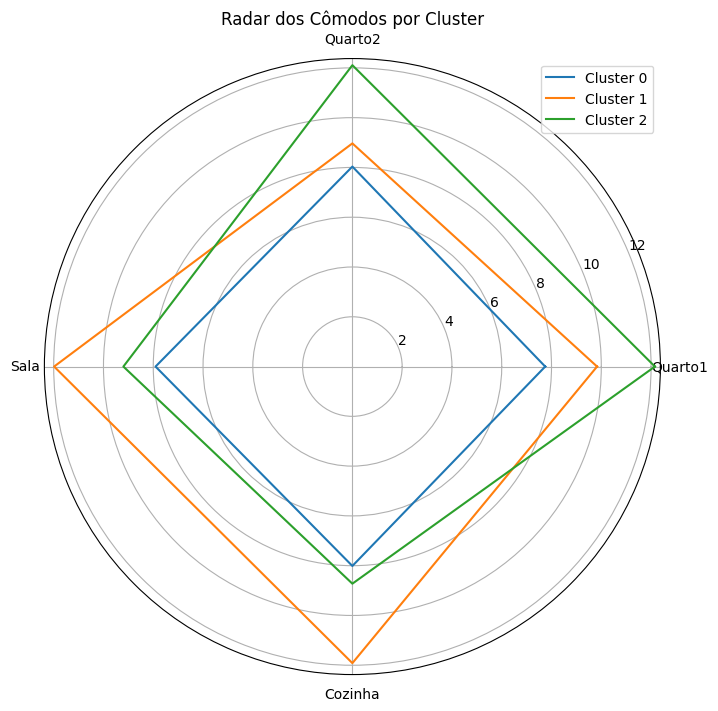

In [48]:
# Usar valores normalizados por cluster
categorias = ['Quarto1', 'Quarto2', 'Sala', 'Cozinha']
angles = np.linspace(0, 2 * np.pi, len(categorias), endpoint=False).tolist()
angles += angles[:1]  # Fechar o c√≠rculo

plt.figure(figsize=(10, 8))
for i, row in perfil_clusters.iterrows():
    valores = [row[cat] for cat in categorias]
    valores += valores[:1]
    plt.polar(angles, valores, label=f'Cluster {i}')

plt.xticks(angles[:-1], categorias)
plt.title('Radar dos C√¥modos por Cluster')
plt.legend()
plt.show()

## üìä Interpreta√ß√£o do Gr√°fico Radar por Cluster

---

### üß≠ Eixos (Quarto1, Quarto2, Sala, Cozinha)

Cada eixo representa um **c√¥modo da resid√™ncia**, e os valores indicam a **m√©dia de acionamentos** nesse c√¥modo, para cada **cluster** identificado pelo algoritmo KMeans.

---

### üìä Linhas coloridas = Clusters

#### üîµ Cluster 0 (Azul)
- Baixos acionamentos em todos os c√¥modos.  
- Perfil equilibrado, nenhum c√¥modo se destaca muito.  
- Provavelmente associado a **baixo ou consumo moderado**.

#### üü† Cluster 1 (Laranja)
- Alta atividade em **Sala** e **Cozinha**.  
- M√©dia alta tamb√©m em **Quarto1** e **Quarto2**.  
- Provavelmente representa usu√°rios de **alto consumo**, especialmente nas **√°reas sociais**.

#### üü¢ Cluster 2 (Verde)
- Altos acionamentos em **Quarto1** e **Quarto2**, mas menores em **Sala** e **Cozinha**.  
- Indica perfil mais voltado a **c√¥modos privados** (quartos).  
- Pode representar fam√≠lias que **passam mais tempo nos quartos** do que nas √°reas sociais.

---

### üß† Interpreta√ß√£o Geral

| Cluster | Perfil                      | Destaques                                              |
|:-------:|-----------------------------|---------------------------------------------------------|
|   0     | üîµ Consumo equilibrado/baixo | Nenhum c√¥modo se destaca ‚Äì tudo na m√©dia ou abaixo.    |
|   1     | üü† Alto consumo nas √°reas sociais | Sala e Cozinha com **picos de acionamento**.        |
|   2     | üü¢ Consumo alto nos quartos  | Quarto1 e Quarto2 com **maiores acionamentos**.        |

---

‚úÖ Use essa an√°lise para direcionar **a√ß√µes de automa√ß√£o, economia e otimiza√ß√£o de consumo** conforme o perfil de cada grupo.


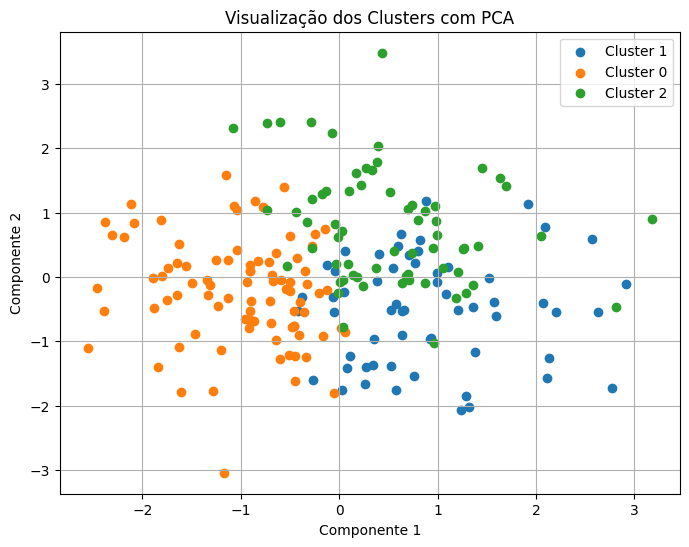

In [49]:
# Reduzir os dados para 2 dimens√µes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar DataFrame com as componentes e os clusters
df_plot = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_plot['Cluster'] = df['Cluster']

# Plotar
plt.figure(figsize=(8,6))
for cluster in df_plot['Cluster'].unique():
    plt.scatter(
        df_plot[df_plot['Cluster'] == cluster]['Componente 1'],
        df_plot[df_plot['Cluster'] == cluster]['Componente 2'],
        label=f'Cluster {cluster}'
    )
plt.title('Visualiza√ß√£o dos Clusters com PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()

# üß† Relat√≥rio Final ‚Äì G√™meo Digital para Monitoramento de Energia

## üéØ Objetivo do Projeto
Desenvolver uma solu√ß√£o baseada em ci√™ncia de dados e intelig√™ncia artificial para **monitorar, prever e otimizar o consumo de energia el√©trica em uma resid√™ncia inteligente** (Smart City Laguna). O projeto simula dados de sensores por c√¥modo e utiliza aprendizado de m√°quina para antecipar padr√µes de consumo e propor a√ß√µes de economia.

---

## üìä Base de Dados Utilizada
Foi utilizada uma base de dados **simulada**, contendo registros di√°rios com as seguintes vari√°veis:

- `Data`: Dia da medi√ß√£o
- `KW/H`: Consumo total de energia em kWh
- `Quarto1`, `Quarto2`, `Sala`, `Cozinha`, `Piscina`: Quantidade de acionamentos de sensores em cada c√¥modo
- `Gera√ß√£o Solar`: Energia gerada por pain√©is solares (simulada)

---

## üîç Pergunta de Neg√≥cio
> ‚ÄúComo prever o consumo di√°rio de energia com base no comportamento por c√¥modo e, a partir disso, propor medidas autom√°ticas de economia e efici√™ncia energ√©tica?‚Äù

---

## üß™ Metodologia e Etapas Realizadas

1. **Importa√ß√£o e visualiza√ß√£o dos dados**  
   Leitura da planilha com `pandas` e valida√ß√£o dos formatos.

2. **Pr√©-processamento**  
   - Convers√£o da coluna `Data` para o formato `datetime`.
   - Cria√ß√£o da vari√°vel `Dia_ordinal` para modelagem.
   - C√°lculo do consumo m√©dio por acionamento por c√¥modo.
   - Simula√ß√£o da gera√ß√£o solar e proje√ß√£o de consumo futuro.

3. **Modelagem Preditiva**  
   Foi treinado um modelo de **Regress√£o Linear** para estimar o consumo (`KW/H`) com base no total de acionamentos por c√¥modo. A previs√£o para o dia seguinte tamb√©m foi implementada.

4. **Visualiza√ß√µes**  
   - Gr√°ficos de s√©ries temporais com `Plotly`.
   - Ranking de c√¥modos mais consumidores.
   - Representa√ß√µes 3D dos acionamentos com simula√ß√£o de sensores.
   - Painel interativo com Streamlit para visualiza√ß√£o em tempo real.

5. **Exporta√ß√£o de Relat√≥rios**  
   Gera√ß√£o autom√°tica de PDF com dados relevantes, gr√°ficos e previs√µes.

---

## üìà Resultados Obtidos

- O modelo de regress√£o apresentou boa capacidade de prever o consumo com base nos acionamentos.
- Identificou-se que **Sala** e **Cozinha** s√£o os c√¥modos com maior impacto no consumo.
- A **piscina**, foi retirada do modelo embora com poucos acionamentos, apresenta alto consumo m√©dio por acionamento, indicando desperd√≠cio pois o projeto laguna se destina a moradia social isso n√£o inclui piscina.
- A gera√ß√£o solar √© capaz de compensar parte significativa do consumo em hor√°rios de pico, se bem gerenciada.

---

## ‚úÖ Conclus√µes e Recomenda√ß√µes

- **Automatizar desligamentos** em ambientes com alto uso como sala e cozinha pode gerar economia imediata.
- **Agendar hor√°rios de uso** da piscina pode mitigar picos de consumo n√£o justificados.
- **Aproveitar a gera√ß√£o solar** para balancear o uso de aparelhos nos hor√°rios de maior gera√ß√£o.
- **Implementar alertas** quando a meta de consumo di√°rio for excedida.

---

## üßæ Entreg√°veis

- Aplica√ß√£o Streamlit com visualiza√ß√£o de sensores em tempo real.
- Relat√≥rio em PDF com m√©tricas de consumo e sugest√µes.
- Notebook com todo o pipeline de dados, modelo preditivo e an√°lises visuais.

---

## üë• P√∫blico-alvo
Este projeto foi desenvolvido para um cliente externo interessado em solu√ß√µes de **efici√™ncia energ√©tica residencial**, com potencial de expans√£o para condom√≠nios, pr√©dios e cidades inteligentes.

---

üìå *Este relat√≥rio foi elaborado com base nas pr√°ticas de ci√™ncia de dados aplicadas ao contexto de consumo energ√©tico residencial e tem como objetivo facilitar a tomada de decis√£o por parte do cliente final.*


Fim!! ‚ö°